In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from PIL import Image

import torch
import torchvision
from torchvision import transforms as tf
import torch.nn as nn
import torch.utils.data as data

In [2]:
root = 'datasets/udacity'
csv_file = os.path.join(root, 'driving_log.csv')
img_folder = os.path.join(root, 'IMG')

In [3]:
table = pd.read_csv(csv_file)
table.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,0.0,0.0,0,0.000030
1,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,0.0,0.0,0,0.000030
2,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,0.0,0.0,0,0.000030
3,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,0.0,0.0,0,0.000037
4,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,D:\GITHUB\resourses\Udacity Driving Simulator\...,0.0,0.0,0,0.000045


In [4]:
traindata, valdata = train_test_split(table, train_size=0.8)

In [5]:
class UdacityDataset(data.Dataset):
    def __init__(self, root, dataframe, transforms = None):
        super().__init__()
        self.root = root
        self.df = dataframe
        self.transforms = transforms
        self.load_data()
        
    def load_data(self):
        self.fns = []
        for idx, row in self.df.iterrows():
            center = os.path.join(self.root, os.path.basename(row[0]))
            left = os.path.join(self.root, os.path.basename(row[1]))
            right = os.path.join(self.root, os.path.basename(row[2]))
            steering = row[3]
            throttle = row[4]
           
            self.fns.append((center,steering,throttle))
            self.fns.append((left,steering+0.2,throttle))
            self.fns.append((right,steering-0.2,throttle))
            
    def __getitem__(self, idx):
        img, steering, throttle = self.fns[idx]
        img = Image.open(img)
        
        if self.transforms is not None:
            img, steering = self.transforms(img, steering) 
            
        steering = torch.FloatTensor([steering])
        throttle = torch.FloatTensor([throttle])
        
        return img, steering, throttle
    
    def __len__(self):
        return len(self.fns)

In [6]:
dataset = UdacityDataset(img_folder, traindata)

tensor([-0.1000])


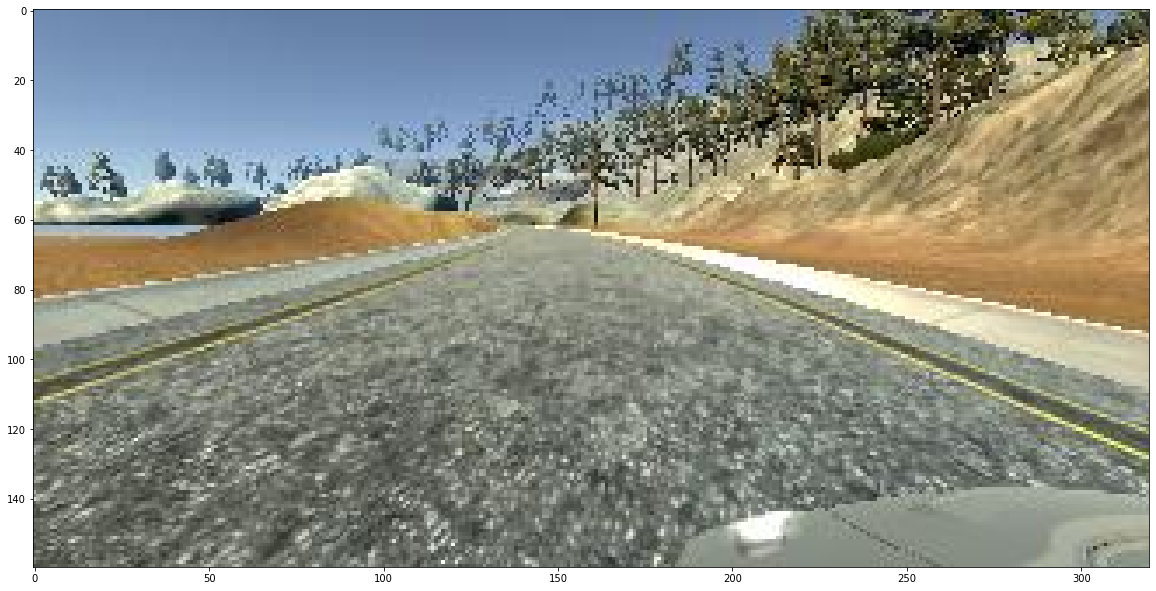

In [10]:
item = dataset[100]
print(item[1])
plt.figure(figsize=(20,20))
plt.imshow(item[0])
plt.show()

In [49]:
class RandomHorizontalFlip(object):
    def __init__(self, ratio=0.5):
        self.ratio = ratio
    def __call__(self, img, steering):
        if random.randint(1,10)/10 <= self.ratio:
            img = np.flip(np.array(img), axis=1)
            steering = -steering
            
        return img, steering

In [50]:
ra = RandomHorizontalFlip()

tensor([-0.1000])


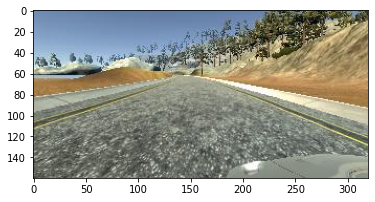

In [58]:
new_img, s = ra(item[0],item[1])
print(s)
plt.imshow(new_img)


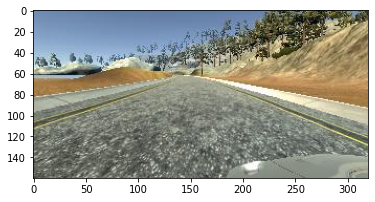